# **MARKET PRICE FORECASTING**

---



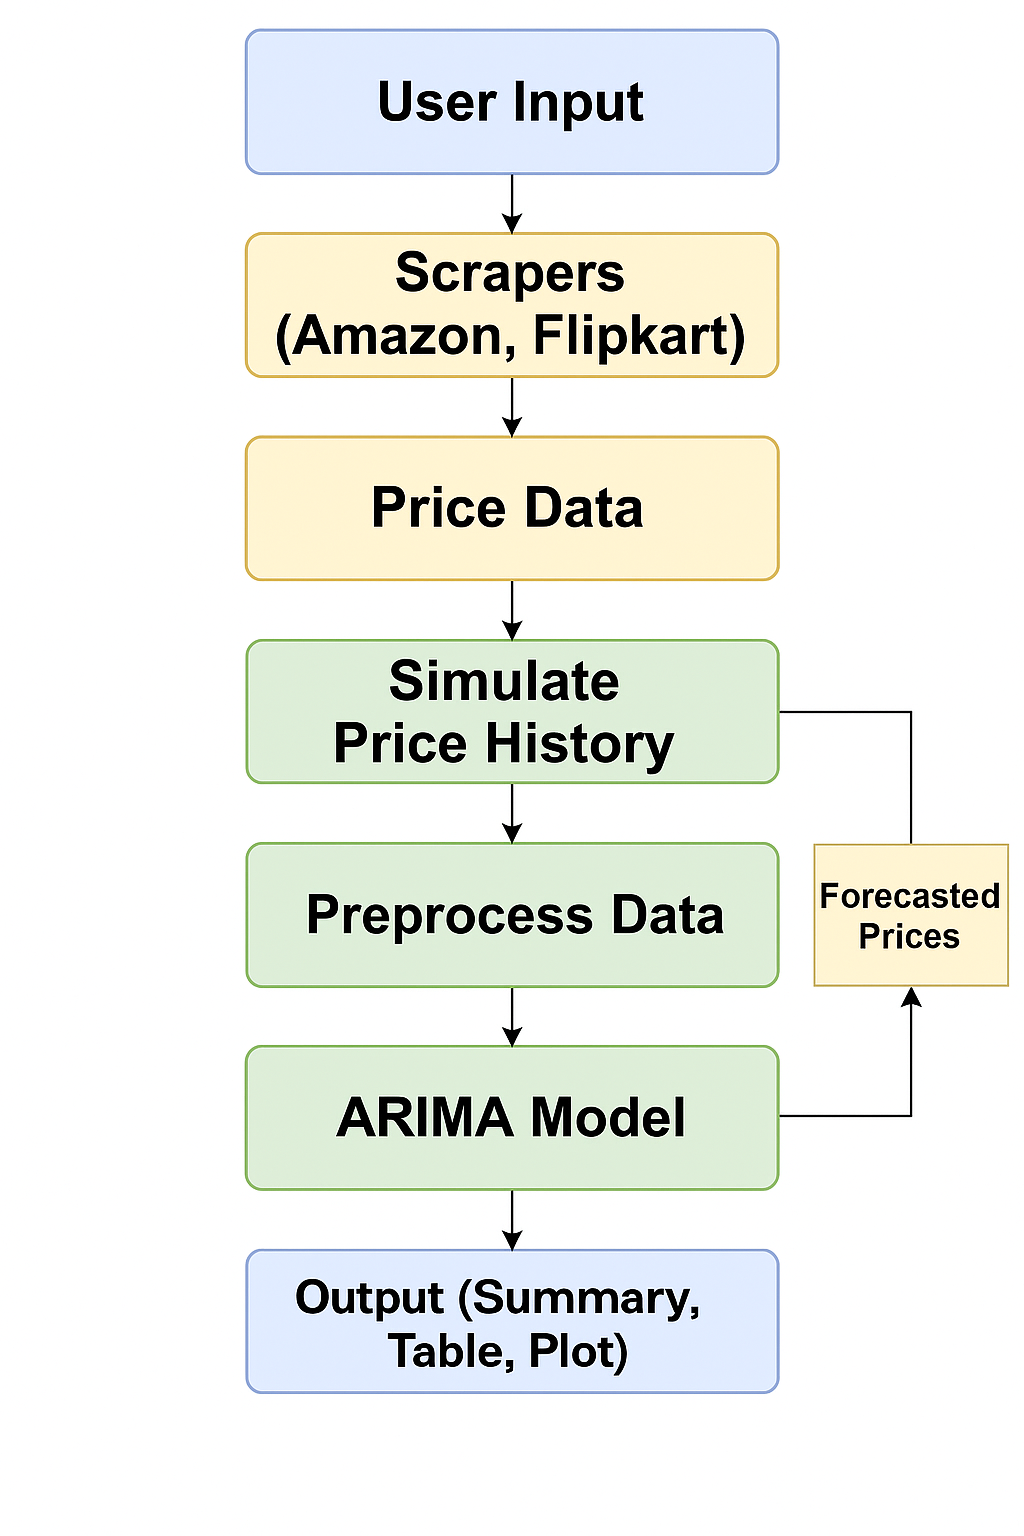

## ***1.Importing Libraries***

In [ ]:
!pip install selenium
!pip install webdriver_manager

In [ ]:
!pip install --force-reinstall --no-cache-dir pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 188.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 202.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 293.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 218.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 229.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 202.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 239.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 141.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 192.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
!pip install --force-reinstall --no-cache-dir numpy==1.23.5 scipy==1.10.1 scikit-learn==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 242.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 257.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 230.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 306.6 MB/s eta 0:00:00
  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 3.6.0
    Uninstalling threadpoolctl-3.6.0:
      Successfully uninstalled threadpoolctl-3.6.0
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.1
    Uninstalling numpy-2.3.1:
      Successfully uninstalled numpy-2.3.1
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstalled joblib-1.5.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.0
    Uninstalling scipy-1.16.0:
      Successf

In [ ]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LinearRegression
import requests
import gradio as gr
import io
from PIL import Image
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import numpy as np
from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

This cell imports all the necessary Python libraries used in the project:

time, datetime: For handling delays and working with dates.

pandas, numpy: For data manipulation and numerical operations.

matplotlib.pyplot: For creating plots and visualizations.

random: To simulate price fluctuations for historical data.

BeautifulSoup, requests: For scraping product data from websites like Flipkart.

selenium: For browser automation to scrape dynamic websites like Amazon, Myntra, and Nykaa.

PIL.Image, io: For processing forecast plots as images.

gradio: To build a user-friendly web interface for the app.

LinearRegression: (Optional) Available for price trend analysis (currently unused).

auto_arima from pmdarima: To automatically build and train an ARIMA model for time series forecasting.

MinMaxScaler: To normalize prices before forecasting for better model performance.

## ***2. Setting Up Selenium Webdriver***

In [ ]:
def init_driver():
    options = Options()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    driver = webdriver.Chrome(options=options)
    return driver


This function sets up a headless Chrome browser using Selenium, which allows the program to browse websites without opening a visible window (ideal for automated scripts).

--headless: Runs Chrome in the background without a GUI.

--no-sandbox and --disable-dev-shm-usage: These options improve compatibility, especially in cloud environments like Google Colab.

Finally, the Chrome WebDriver is initialized with these settings and returned for use in scraping dynamic websites like Amazon, Myntra, and Nykaa.

## ***3. Web Scraping***



> ***3.1 Flipkart Scraping***



In [ ]:
def scrape_flipkart_selenium(driver, product_name):

    try:
        clean_product = product_name.replace(' ', '%20')
        url = f"https://www.flipkart.com/search?q={clean_product}"

        print(f"Using Selenium for Flipkart: {url}")
        driver.get(url)
        time.sleep(5)  # Wait for page to load

        items = []

        # Try multiple selector strategies with Selenium
        selectors = [
            "div[data-id]",
            "div._1AtVbE",
            "div._13oc-S",
            "div[data-testid='product-base']"
        ]

        containers = []
        for selector in selectors:
            try:
                containers = driver.find_elements(By.CSS_SELECTOR, selector)
                if containers:
                    print(f"Found {len(containers)} containers with: {selector}")
                    break
            except:
                continue

        for container in containers[:10]:
            try:
                # Try multiple ways to find title and price
                title_element = None
                price_element = None

                # Title selectors
                title_selectors = [
                    "div._4rR01T",
                    "a.IRpwTa",
                    "a.s1Q9rs",
                    "div.KzDlHZ"
                ]

                for sel in title_selectors:
                    try:
                        title_element = container.find_element(By.CSS_SELECTOR, sel)
                        if title_element:
                            break
                    except:
                        continue

                # Price selectors
                price_selectors = [
                    "div._30jeq3._1_WHN1",
                    "div._30jeq3",
                    "div.Nx9bqj",
                    "div._1_WHN1"
                ]

                for sel in price_selectors:
                    try:
                        price_element = container.find_element(By.CSS_SELECTOR, sel)
                        if price_element:
                            break
                    except:
                        continue

                if title_element and price_element:
                    title_text = title_element.text.strip()
                    price_text = price_element.text.strip()

                    # Extract price
                    import re
                    price_match = re.search(r'(\d+(?:,\d+)*)', price_text.replace("₹", "").replace(",", ""))
                    if price_match:
                        price_value = int(price_match.group(1).replace(",", ""))
                        if 10 <= price_value <= 1000000:
                            items.append({
                                "Platform": "Flipkart",
                                "Product": title_text,
                                "Price (₹)": price_value
                            })
                            print(f"Selenium found: {title_text[:50]}... - ₹{price_value}")

                if len(items) >= 5:
                    break

            except Exception as e:
                continue

        return items

    except Exception as e:
        print(f"Selenium Flipkart error: {e}")
        return []



This function scrapes product data from Flipkart using Selenium, which is useful when content is loaded dynamically

How It Works:
Constructs the Flipkart search URL using the entered product name.
Opens the page in a headless browser and waits for content to load.
Tries multiple CSS selectors to reliably locate product containers, names, and prices (since Flipkart’s structure can vary).

Extracts the product title and price, filters out invalid values, and returns the top 5 valid product listings.



> ***3.2 Amazon Scraping***



In [ ]:
def scrape_amazon(driver, product_name):
    try:
        items = []
        driver.get(f"https://www.amazon.in/s?k={product_name.replace(' ', '+')}")
        time.sleep(3)
        cards = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")

        for card in cards[:5]:
            try:
                title = card.find_element(By.TAG_NAME, 'h2').text
                price = card.find_element(By.CLASS_NAME, 'a-price-whole').text.replace(",", "")
                items.append({
                    "Platform": "Amazon",
                    "Product": title,
                    "Price (₹)": int(price)
                })
            except:
                continue
        return items
    except:
        return []

This function uses Selenium to scrape product details from Amazon India.

What It Does:
Builds the search URL using the user’s input product name.
Loads the page in the browser and waits a few seconds for results to appear.
Finds all product result blocks using XPath: //div[@data-component-type='s-search-result'].

For each product (up to 5 results):
Extracts the title and price.
Cleans and converts the price into an integer (₹).
Returns a list of top 5 matching products with their prices.
This dynamic scraping ensures that even content loaded with JavaScript is captured accurately.





> ***3.3 Nykaa and Myntra Scrapping (Future Use)***



In [ ]:
#Nykaa Scraper
def scrape_nykaa(driver, product_name):
    try:
        items = []
        driver.get(f"https://www.nykaa.com/search/result/?q={product_name.replace(' ', '%20')}")
        time.sleep(3)
        cards = driver.find_elements(By.CLASS_NAME, 'css-xrzmfa')

        for card in cards[:5]:
            try:
                title = card.find_element(By.CLASS_NAME, 'css-1rd7vky').text
                price = card.find_element(By.CLASS_NAME, 'css-111z9ua').text.replace("₹", "").replace(",", "")
                items.append({
                    "Platform": "Nykaa",
                    "Product": title,
                    "Price (₹)": int(price)
                })
            except:
                continue
        return items
    except:
        return []

#Myntra Scraper
def scrape_myntra(driver, product_name):
    try:
        items = []
        driver.get(f"https://www.myntra.com/{product_name.replace(' ', '-')}")
        time.sleep(3)
        cards = driver.find_elements(By.CLASS_NAME, "product-base")

        for card in cards[:5]:
            try:
                title = card.find_element(By.CLASS_NAME, 'product-product').text
                price = card.find_element(By.CLASS_NAME, 'product-discountedPrice').text.replace("Rs. ", "").replace(",", "")
                items.append({
                    "Platform": "Myntra",
                    "Product": title,
                    "Price (₹)": int(price)
                })
            except:
                continue
        return items
    except:
        return []



These two functions scrape product prices and names from Nykaa and Myntra, using Selenium for dynamic web content handling.

scrape_nykaa(driver, product_name)
Searches for the product on Nykaa.
Locates product cards using the class name 'css-xrzmfa'.

Extracts:
Product title from 'css-1rd7vky'.
Price from 'css-111z9ua'.
Cleans the price string and returns the top 5 matching items.
scrape_myntra(driver, product_name)
Builds the product search URL using dashes (e.g., face-wash).
Searches on Myntra.
Finds product blocks with 'product-base' class.

Extracts:
Product name from 'product-product'.
Discounted price from 'product-discountedPrice'.
Returns the top 5 valid product listings.


## ***4. Simulating Historic Price Data***

In [ ]:

def simulate_price_history(base_price, days=90):
    today = datetime.date.today()
    dates = [today - datetime.timedelta(days=i) for i in range(days)]

    prices = []
    for i in range(days):
        trend_factor = 1 + (i * random.uniform(0.001, 0.01))
        fluctuation = random.uniform(-0.01, 0.01)
        price = base_price * trend_factor * (1 + fluctuation)

        prices.append(price)

    df = pd.DataFrame({"Date": dates, "Price": prices})
    df.sort_values("Date", inplace=True)
    return df


This function generates a synthetic 90-day price history for a given product using a combination of trend and random noise.

How It Works:
Starts with today’s date and goes back n days (default is 90).

For each day:
Applies a small upward trend factor to simulate gradual price increase.
Adds a small random fluctuation (both positive and negative) to mimic real-world volatility.
Computes a simulated price based on these effects and the given base_price.

Returns a DataFrame with:
Date: The past n dates.
Price: The simulated price for each date.

This synthetic data mimics how prices change over time, which is useful when actual historical data isn't available.



## ***5. Pre Processing***

In [ ]:
def preprocess_data(df):
    df = df.copy()
    df['Price'] = df['Price'].astype(float)
    df = df[(np.abs(df['Price'] - df['Price'].mean()) <= (3 * df['Price'].std()))]  # outlier removal
    scaler = MinMaxScaler()
    df['Scaled_Price'] = scaler.fit_transform(df[['Price']])
    return df, scaler

Convert Prices to Float: Ensures numeric consistency.

Outlier Removal: Filters out extreme price values that lie beyond 3 standard deviations from the mean. This keeps the dataset clean and more realistic.

Normalization (Min-Max Scaling):
Scales prices between 0 and 1 using MinMaxScaler.
This helps improve the performance and stability of forecasting models like ARIMA.

Output:
A cleaned and scaled DataFrame.
The fitted scaler object, which is needed later to reverse the scaling after forecasting.



## ***6. Model Building***





> ***ARIMA Model***






In [ ]:
def forecast_price_arima(df, scaler, n_days=10):
    df_sorted = df.sort_values("Date")
    prices = df_sorted['Scaled_Price'].values

    # Use 80% for training, 20% for testing (backtesting)
    train_size = int(len(prices) * 0.8)
    train, test = prices[:train_size], prices[train_size:]

    # Train ARIMA
    model = auto_arima(train, seasonal=False, suppress_warnings=True, stepwise=True)

    # Forecast the length of test set
    forecast_scaled = model.predict(n_periods=len(test))
    forecast = scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).flatten()
    actual = scaler.inverse_transform(test.reshape(-1, 1)).flatten()

    # Accuracy metrics
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    rmse = np.sqrt(mse)


    metrics = {
        "MAE": round(mae, 2),
        "MSE": round(mse, 2),
        "RMSE": round(rmse, 2),

    }

    # Forecast future n_days
    model_full = auto_arima(prices, seasonal=False, suppress_warnings=True, stepwise=True)
    future_scaled = model_full.predict(n_periods=n_days)
    future = scaler.inverse_transform(future_scaled.reshape(-1, 1)).flatten()

    future_dates = [df_sorted["Date"].max() + datetime.timedelta(days=i) for i in range(1, n_days + 1)]
    prediction_df = pd.DataFrame({
        "Date": future_dates,
        "Predicted Price (₹)": future
    })

    return prediction_df, metrics


This function performs price forecasting using the ARIMA (AutoRegressive Integrated Moving Average) model and also evaluates its prediction accuracy. It begins by sorting the historical price data by date and then splits it into two parts: 80% for training and 20% for testing. The ARIMA model is trained on the training portion using auto_arima(), which automatically selects the best parameters. Predictions are made on the test data, and the results are scaled back to the original price range. To measure how well the model performs, it calculates common error metrics including MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error). After backtesting, the function retrains ARIMA on the full dataset and forecasts prices for the next n_days (default is 10). It then returns a DataFrame with future predicted prices along with a dictionary of the accuracy metrics.



## ***7. Model Integration Pipeline***

In [ ]:
def run_pipeline(product_name, platform):
    if not product_name or not product_name.strip():
        return "❌ Please enter a valid product name.", pd.DataFrame(), None

    driver = init_driver()
    avg_price = None
    scraped_data = []
    try:
        if platform == "Amazon":
            scraped_data = scrape_amazon(driver, product_name)
        elif platform == "Flipkart":
            scraped_data = scrape_flipkart_selenium(driver, product_name)

        if scraped_data:
            prices = [item["Price (₹)"] for item in scraped_data]
            avg_price = sum(prices) / len(prices)

    except Exception as e:
        print(f"Scraping error: {e}")

    finally:
        driver.quit()

    if not avg_price:
        return f"❌ No price data found for '{product_name}' on {platform}.", pd.DataFrame(), None

    price_history = simulate_price_history(avg_price, days=90)
    processed_df, scaler = preprocess_data(price_history)
    prediction_df, metrics = forecast_price_arima(processed_df, scaler, n_days=10)

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(prediction_df["Date"], prediction_df["Predicted Price (₹)"],
             marker='o', color='green', linewidth=2, markersize=6)
    plt.title(f"10-Day Price Forecast for '{product_name}' on {platform}\n(Based on {len(scraped_data)} products, avg: ₹{avg_price:.2f})")
    plt.xlabel("Date")
    plt.ylabel("Predicted Price (₹)")
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()

    buf = io.BytesIO()
    plt.savefig(buf, format='png', dpi=150, bbox_inches='tight')
    buf.seek(0)
    img = Image.open(buf)
    plt.close()

    summary = (f"📈 Successfully scraped {len(scraped_data)} products from {platform}\n"
               f"💰 Average current price: ₹{avg_price:.2f}\n"
               f"🔮 10-day price predictions generated using ARIMA model\n\n"
               f"📊 **Accuracy Metrics:**\n"
               f"• MAE: {metrics['MAE']}\n"
               f"• MSE: {metrics['MSE']}\n"
               f"• RMSE: {metrics['RMSE']}\n"
               )

    return summary, prediction_df, img

This function serves as the main end-to-end pipeline for price forecasting. It begins by checking the user input for a valid product name. Based on the selected platform (either Amazon or Flipkart), it launches a Selenium WebDriver and calls the corresponding scraping function to collect real-time product prices. Once prices are retrieved, it calculates the average price from the scraped data. If no price data is found, it returns an error message. Otherwise, it simulates 90 days of historical prices using this average, then preprocesses the data by removing outliers and scaling the prices using MinMaxScaler. It then forecasts the next 10 days of prices using an ARIMA model trained on the processed data. The forecast results are plotted using matplotlib, and the plot is saved in memory as an image for display. Along with the prediction table and graph, the function returns a summary containing the number of products scraped, the average price, and key accuracy metrics such as MAE, MSE, and RMSE to evaluate the model’s performance.



## ***8. Gradio Application***

In [ ]:
theme = gr.themes.Soft(
    primary_hue="emerald",
    secondary_hue="pink",
).set(
    body_background_fill="linear-gradient(to right, #ff9a9e, #fad0c4, #fbc2eb, #a6c1ee, #84fab0, #8fd3f4)",
    button_primary_background_fill="linear-gradient(to right, #43cea2, #185a9d)",
    button_primary_text_color="white"
)

with gr.Blocks(theme=theme, css="""
    body, .gr-block, .gr-textbox, .gr-button, .gr-dataframe, .gr-image {
        font-family: 'Poppins', sans-serif !important;
    }
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;600&display=swap');
""") as demo:
    gr.Markdown("##  **PricePilot - A Price Forecasting Application**")
    gr.Markdown(
        "🔍 Enter a product name and choose the platform (Amazon or Flipkart).\n\n"
        "📈 You'll receive a 10-day price prediction in table and graph formats.\n"
        "🧠 Powered by AI + Live Price Scraping!"
    )

    input_box = gr.Textbox(label="🛍️ Enter Product Name")
    site_dropdown = gr.Dropdown(choices=["Amazon", "Flipkart"], label="🛒 Choose Platform", value="Amazon")
    output_text = gr.Textbox(label="📢 Forecast Summary")
    output_table = gr.Dataframe(label="📅 10-Day Price Forecast Table")
    output_plot = gr.Image(label="📊 Forecast Graph")

    submit_btn = gr.Button("🔎 Predict Price", variant="primary")

    submit_btn.click(fn=run_pipeline, inputs=[input_box, site_dropdown], outputs=[output_text, output_table, output_plot])

demo.queue().launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de26d9f5b51c4cad7e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
